In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [19]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from src.problem import load_model

In [59]:
data_dir = Path('../data/raw/instances/3_anonymous')

instances_fps = list(data_dir.glob('valid/*.mps.gz'))
len(instances_fps)

20

In [60]:
instance_fp = np.random.choice(instances_fps)
print(instance_fp.name)

m = load_model(instance_fp)
m.setRealParam('limits/time', 60.0)
m.setIntParam('limits/maxsol', 500)
m.setBoolParam('constraints/countsols/collect', True)

m.optimize()

anonymous_102.mps.gz
original problem has 6049 variables (2456 bin, 2868 int, 0 impl, 725 cont) and 2160 constraints
presolving:
(round 1, fast)       1421 del vars, 113 del conss, 0 add conss, 2149 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 773 clqs
(round 2, fast)       1421 del vars, 113 del conss, 0 add conss, 2161 chg bounds, 358 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 1062 clqs
(round 3, fast)       1426 del vars, 118 del conss, 0 add conss, 2161 chg bounds, 358 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 1062 clqs
   (0.0s) running MILP presolver
   (0.0s) MILP presolver (7 rounds): 109 aggregations, 0 fixings, 12 bound changes
(round 4, medium)     1538 del vars, 119 del conss, 0 add conss, 2173 chg bounds, 358 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 1044 clqs
(round 5, fast)       1538 del vars, 228 del conss, 0 add conss, 2173 chg bounds, 358 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 1067 clqs
(round 6, exhaustive) 1538 del vars, 2

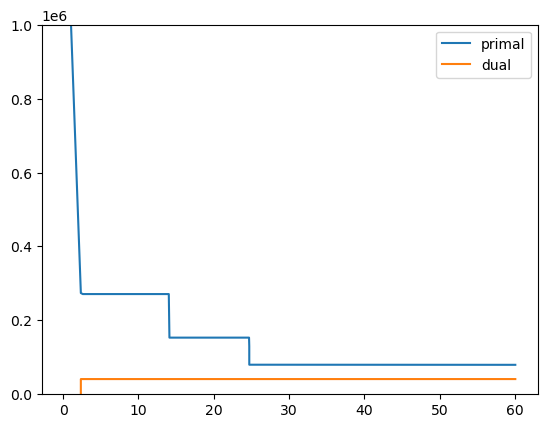

In [66]:
plt.plot(*m.get_primal_curve(), label='primal')
plt.plot(*m.get_dual_curve(), label='dual')
plt.ylim(0,1e6)

plt.legend()
plt.show()